In [1]:
using DifferentialEquations
using Plots 
using Statistics

In [2]:
# Example for solving a system of equations: Lorenz equations: 
function lorenz!(du,u,p,t)
 du[1] = 10.0*(u[2]-u[1])
 du[2] = u[1]*(28.0-u[3]) - u[2]
 du[3] = u[1]*u[2] - (8/3)*u[3]
end
u0 = [1.0;0.0;0.0]
tspan = (0.0,100.0)
prob = ODEProblem(lorenz!,u0,tspan)
sol = solve(prob)

retcode: Success
Interpolation: Automatic order switching interpolation
t: 1294-element Array{Float64,1}:
   0.0                  
   3.5678604836301404e-5
   0.0003924646531993154
   0.0032624077544510573
   0.009058075635317072 
   0.01695646895607931  
   0.0276899566248403   
   0.041856345938267966 
   0.06024040228733675  
   0.08368539694547242  
   0.11336497050342806  
   0.14862178548871152  
   0.18703974465019643  
   ⋮                    
  99.15166031662457     
  99.22514723290307     
  99.31227549560941     
  99.39403070915297     
  99.47001147494375     
  99.54379656909015     
  99.614651558349       
  99.69093823148101     
  99.78733023233721     
  99.86114450046736     
  99.96115759510786     
 100.0                  
u: 1294-element Array{Array{Float64,1},1}:
 [1.0, 0.0, 0.0]                    
 [0.999643, 0.000998805, 1.78143e-8]
 [0.996105, 0.0109654, 2.14696e-6]  
 [0.969359, 0.0897706, 0.000143802] 
 [0.924204, 0.242289, 0.00104616]   
 [0.880046, 0.43

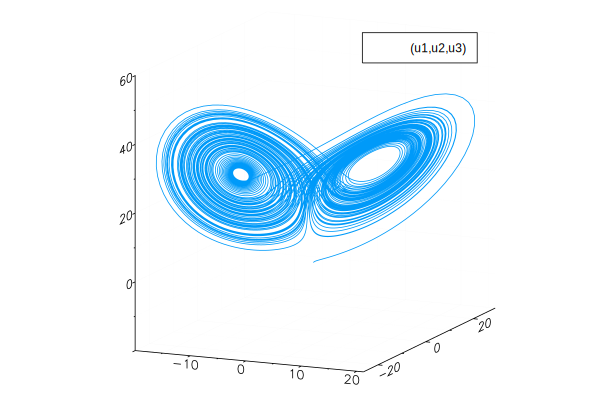

In [3]:
plot(sol,vars=(1,2,3))

In [4]:
#I = 280 pA
function hodgkin!(du,u,p,t)
    du[1] = 1/(9*pi)*(((1080*pi)*u[3]^3*u[4]*(115-u[1]))+((324*pi)*u[2]^4*(-12-u[1]))+(2.7*pi)*(10.6-u[1])+280) # dv/dt , I = 280 and m=u[3], h=u[4], n=u[2]
    du[2] = (((10-u[1])/(100*(exp((10-u[1])/10)-1)))*(1-u[2]))-(0.125*exp(-u[1]/80))*u[2] # dn/dt 
    du[3] = (((25-u[1])/(10*(exp((25-u[1])/10)-1)))*(1-u[3]))-((4*exp(-u[1]/18))*u[3]) # dm/dt where 
    du[4] = (0.07*exp(-u[1]/20)*(1-u[4]))-((1/(exp((30-u[1])/10)+1))*u[4]) # dh/dt 
end
dt= 10^(-2)
u0 = [0.0;rand();rand();rand();rand()]
tspan = (0.0,200.0)
prob = ODEProblem(hodgkin!,u0,tspan)
sol = solve(prob, saveat=dt);

In [5]:
# I = 350 pA
function hodgkin!(du,u,p,t)
    du[1] = 1/(9*pi)*(((1080*pi)*u[3]^3*u[4]*(115-u[1]))+((324*pi)*u[2]^4*(-12-u[1]))+(2.7*pi)*(10.6-u[1])+350) # dv/dt , I = 280 and m=u[3], h=u[4], n=u[2]
    du[2] = (((10-u[1])/(100*(exp((10-u[1])/10)-1)))*(1-u[2]))-(0.125*exp(-u[1]/80))*u[2] # dn/dt 
    du[3] = (((25-u[1])/(10*(exp((25-u[1])/10)-1)))*(1-u[3]))-((4*exp(-u[1]/18))*u[3]) # dm/dt where 
    du[4] = (0.07*exp(-u[1]/20)*(1-u[4]))-((1/(exp((30-u[1])/10)+1))*u[4]) # dh/dt 
end
dt=10^(-2)
u0 = [0.0;rand();rand();rand();rand()]
tspan = (0.0,200.0)
prob = ODEProblem(hodgkin!,u0,tspan)
sol1 = solve(prob, saveat=dt);

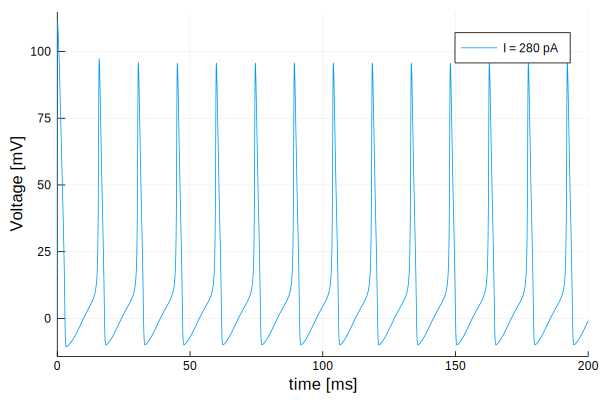

In [6]:
plot(sol,vars=(1),xlabel = "time [ms]",ylabel="Voltage [mV]",label="I = 280 pA")
#savefig("Voltage-280.pdf")

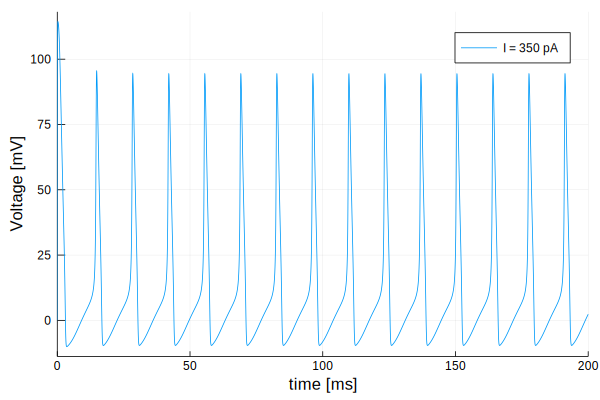

In [7]:
plot(sol1,vars=(1),xlabel = "time [ms]",ylabel="Voltage [mV]",label="I = 350 pA")
#savefig("Voltage-350.pdf")

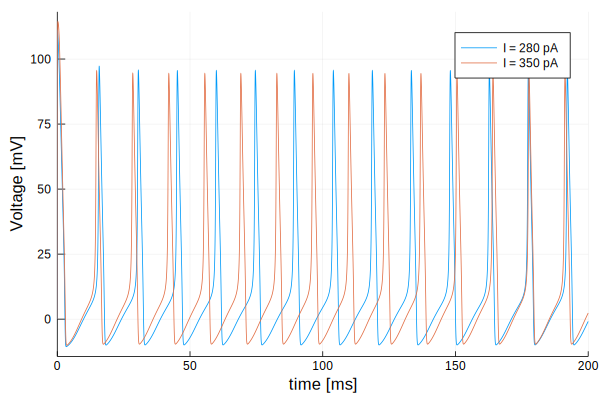

In [8]:
plot(sol,vars=(1),xlabel = "time [ms]",ylabel="Voltage [mV]",label="I = 280 pA")
plot!(sol1,vars=(1),xlabel = "time [ms]",ylabel="Voltage [mV]",label="I = 350 pA")
#savefig("Voltages.pdf")

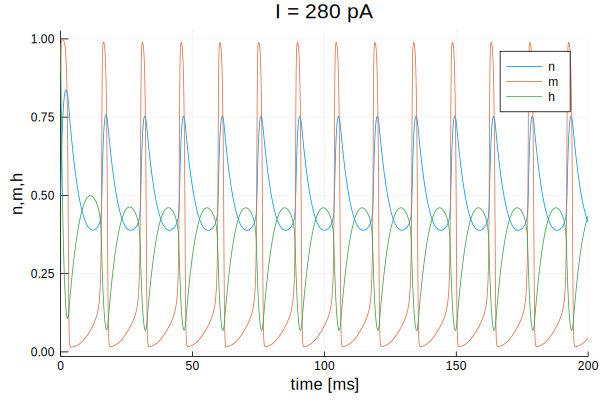

In [9]:
plot(sol,vars=(2),xlabel = "time [ms]",ylabel="n,m,h",label="n",title="I = 280 pA")
plot!(sol,vars=(3),xlabel = "time [ms]",label="m")
plot!(sol,vars=(4),xlabel = "time [ms]",label="h")
#savefig("Channels-280.pdf")

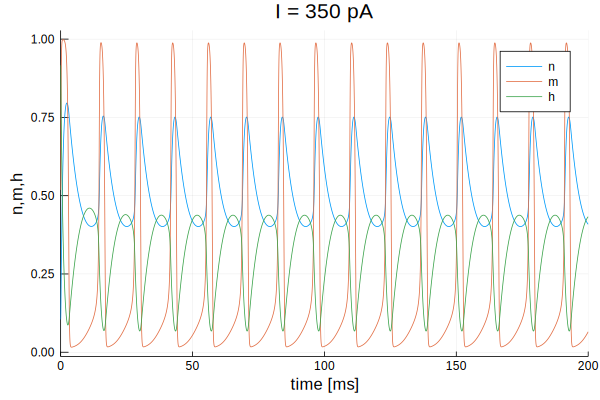

In [10]:
plot(sol1,vars=(2),xlabel = "time [ms]",ylabel="n,m,h",label="n",title="I = 350 pA")
plot!(sol1,vars=(3),xlabel = "time [ms]",label="m")
plot!(sol1,vars=(4),xlabel = "time [ms]",label="h")
#savefig("Channels-350.pdf")

In [11]:
time = getindex.(sol.t,1)
voltage = getindex.(sol.u,1)
n = getindex.(sol.u,2)
m = getindex.(sol.u,3)
h = getindex.(sol.u,4);

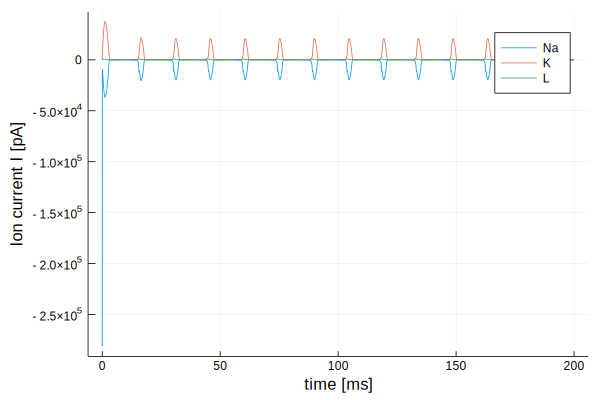

In [12]:
I_Na =@. (1080*pi)m^3*h*(voltage-115)
I_K =@. (324*pi)*n^4*(voltage+12)
I_L =@. (2.7*pi)*(voltage-10.6)
plot(time,I_Na,xlabel = "time [ms]",ylabel="Ion current I [pA]",label="Na")
plot!(time,I_K,label="K")
plot!(time,I_L,label="L")
#savefig("IonCurrent.pdf")

In [13]:
time = getindex.(sol1.t,1)
voltage = getindex.(sol1.u,1)
n = getindex.(sol1.u,2)
m = getindex.(sol1.u,3)
h = getindex.(sol1.u,4);

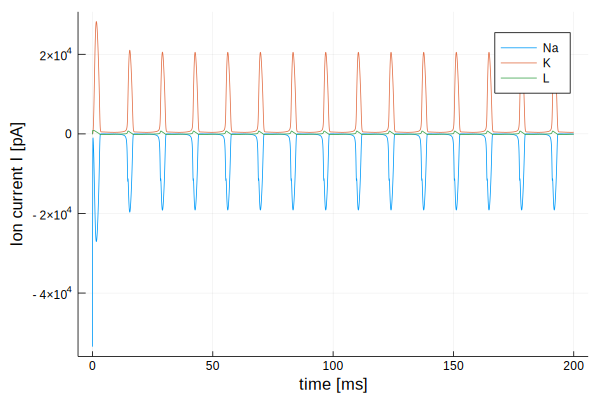

In [14]:
I_Na =@. (1080*pi)m^3*h*(voltage-115)
I_K =@. (324*pi)*n^4*(voltage+12)
I_L =@. (2.7*pi)*(voltage-10.6)
plot(time,I_Na,xlabel = "time [ms]",ylabel="Ion current I [pA]",label="Na")
plot!(time,I_K,label="K")
plot!(time,I_L,label="L")
#savefig("IonCurrent-350.pdf")

# Frequencies ( two approaches - second one works properly)

In [15]:
function findlocalmaxima(signal::Vector)
   inds = Int[]
   if length(signal)>1
       if signal[1]>signal[2]
           push!(inds,1)
       end
       for i=2:length(signal)-1
           if signal[i-1]<signal[i]>signal[i+1]
               push!(inds,i)
           end
       end
       if signal[end]>signal[end-1]
           push!(inds,length(signal))
       end
   end
   inds
 end

findlocalmaxima (generic function with 1 method)

In [16]:
# Some error I can't find! 

function hodgkin!(du,u,p,t)
    du[1] = 1/(9*pi)*(((1080*pi)*u[3]^3*u[4]*(115-u[1]))+((324*pi)*u[2]^4*(-12-u[1]))+(2.7*pi)*(10.6-u[1])+p[1]) # dv/dt , I = 280 and m=u[3], h=u[4], n=u[2]
    du[2] = (((10-u[1])/(100*(exp((10-u[1])/10)-1)))*(1-u[2]))-(0.125*exp(-u[1]/80))*u[2] # dn/dt 
    du[3] = (((25-u[1])/(10*(exp((25-u[1])/10)-1)))*(1-u[3]))-((4*exp(-u[1]/18))*u[3]) # dm/dt where 
    du[4] = (0.07*exp(-u[1]/20)*(1-u[4]))-((1/(exp((30-u[1])/10)+1))*u[4]) # dh/dt 
end
frequencies = []
time_differences = []
dt=10^(-1)
u0 = [0.0;rand();rand();rand();rand()]
tspan = (0.0,500.0)

#First value 
I=150
    p = [I]
    prob = ODEProblem(hodgkin!,u0,tspan,p)
    sol2 = solve(prob, saveat=dt)
    maxima_times = getindex.(sol2.t,1)[findlocalmaxima(getindex.(sol2.u,1))]
    if mod(length(maxima_times),2)!=0
    l = length(maxima_times)
    else
        l = Int(2*trunc(length(maxima_times)/2))-2
    end
    
    for i in 1:l-2
        push!(time_differences, maxima_times[i+1]-maxima_times[i])
    end
    push!(frequencies, 1/mean(time_differences))


for i in 160:10:350
    # take last values of previous run for initial values
    u0 = [getindex.(sol2.u,1)[end];getindex.(sol2.u,2)[end];getindex.(sol2.u,3)[end];getindex.(sol2.u,4)[end]]
    # set i as new I_0
    p = [i]
    prob = ODEProblem(hodgkin!,u0,tspan,p)
    sol2 = solve(prob, saveat=dt)
    maxima_times = getindex.(sol2.t,1)[findlocalmaxima(getindex.(sol2.u,1))]
    Vs = getindex.(sol2.u,1)[findlocalmaxima(getindex.(sol2.u,1))]
    short_peaks = Vs[Vs .< 50]
    
    if length(short_peaks) == 0 
        
        # Check if odd or even number of maxima 
        if mod(length(maxima_times),2)!=0
            l = length(maxima_times)
        else
            l = length(maxima_times)-1
        end

        # get time differences 
        time_differences = []
        for i in 2:l-2
            push!(time_differences, maxima_times[i+1]-maxima_times[i])
        end

        # take frequency as inverse of the mean of the time differences between maxima 
        push!(frequencies, 1000/mean(time_differences))
    else
        push!(frequencies, 0)
    end
end

In [17]:
# Second approach! 

function frequency(data, threshold)
    V = getindex.(data.u,1)
    
    ts = []
    Vs = []
    
    for i in 3:length(V)
        if V[i-2] < V[i-1] && V[i] < V[i-1]
            append!(ts, getindex.(data.t,1)[i-1])
            append!(Vs, getindex.(data.u,1)[i-1])
        end
    end
    
    periods = (circshift(ts, -1).-ts)[1:end-1]
    
    short_peaks = Vs[Vs .< threshold]
    
    if length(periods) == 0
        freq = 0 
        err = 0 
    elseif length(short_peaks)>0
        freq = 0 
        err = 0
    else
        freq = 1/mean(periods)*1000 
        err = 1000 * sqrt(var(periods)/length(periods))/mean(periods)^2
    end
    return freq
end

frequency (generic function with 1 method)

In [18]:
# Works this way! 

function hodgkin!(du,u,p,t)
    du[1] = 1/(9*pi)*(((1080*pi)*u[3]^3*u[4]*(115-u[1]))+((324*pi)*u[2]^4*(-12-u[1]))+(2.7*pi)*(10.6-u[1])+p[1]) # dv/dt , I = 280 and m=u[3], h=u[4], n=u[2]
    du[2] = (((10-u[1])/(100*(exp((10-u[1])/10)-1)))*(1-u[2]))-(0.125*exp(-u[1]/80))*u[2] # dn/dt 
    du[3] = (((25-u[1])/(10*(exp((25-u[1])/10)-1)))*(1-u[3]))-((4*exp(-u[1]/18))*u[3]) # dm/dt where 
    du[4] = (0.07*exp(-u[1]/20)*(1-u[4]))-((1/(exp((30-u[1])/10)+1))*u[4]) # dh/dt 
end
frequencies = []
time_differences = []
dt=10^(-1)
u0 = [0.0;rand();rand();rand();rand()]
tspan = (0.0,500.0)

#First value 
I=150
    p = [I]
    prob = ODEProblem(hodgkin!,u0,tspan,p)
    sol2 = solve(prob, saveat=dt)
    freq = frequency(sol2, 75)
    
    # take frequency as inverse of the mean of the time differences between maxima 
    push!(frequencies, freq)


for i in 151:350
    # take last values of previous run for initial values
    u0 = [getindex.(sol2.u,1)[end];getindex.(sol2.u,2)[end];getindex.(sol2.u,3)[end];getindex.(sol2.u,4)[end]]
    # set i as new I_0
    p = [i]
    prob = ODEProblem(hodgkin!,u0,tspan,p)
    sol2 = solve(prob, saveat=dt)
    
    freq = frequency(sol2, 75)
    
    # take frequency as inverse of the mean of the time differences between maxima 
    push!(frequencies, freq)
end

In [19]:
frequencies

201-element Array{Any,1}:
  0               
  0               
  0               
  0               
  0               
  0               
  0               
  0               
  0               
  0               
  0               
  0               
  0               
  ⋮               
 72.90400972053462
 72.9622680842193 
 73.03712720632987
 73.1146856068519 
 73.18560683065664
 73.26007326007327
 73.32914309658496
 73.4094616639478 
 73.48438456827922
 73.5603194619588 
 73.61963190184049
 73.7100737100737 

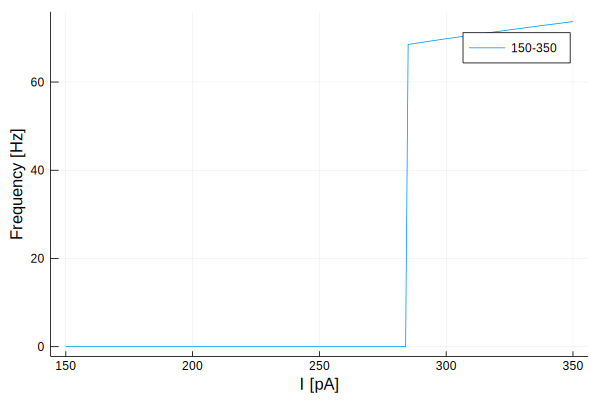

In [20]:
currents = collect(150:350)
plot(currents,frequencies,xlabel ="I [pA]" ,ylabel="Frequency [Hz]",label="150-350")
#savefig("FreqUp.pdf")

In [21]:
function hodgkin!(du,u,p,t)
    du[1] = 1/(9*pi)*(((1080*pi)*u[3]^3*u[4]*(115-u[1]))+((324*pi)*u[2]^4*(-12-u[1]))+(2.7*pi)*(10.6-u[1])+p[1]) # dv/dt , I = 280 and m=u[3], h=u[4], n=u[2]
    du[2] = (((10-u[1])/(100*(exp((10-u[1])/10)-1)))*(1-u[2]))-(0.125*exp(-u[1]/80))*u[2] # dn/dt 
    du[3] = (((25-u[1])/(10*(exp((25-u[1])/10)-1)))*(1-u[3]))-((4*exp(-u[1]/18))*u[3]) # dm/dt where 
    du[4] = (0.07*exp(-u[1]/20)*(1-u[4]))-((1/(exp((30-u[1])/10)+1))*u[4]) # dh/dt 
end
frequencies2 = []
time_differences = []
dt=10^(-1)
u0 = [0.0;rand();rand();rand();rand()]
tspan = (0.0,500.0)

#First value 
I=350
    p = [I]
    prob = ODEProblem(hodgkin!,u0,tspan,p)
    sol2 = solve(prob, saveat=dt)
    freq = frequency(sol2, 75)
    
    # take frequency as inverse of the mean of the time differences between maxima 
    push!(frequencies2, freq)


for i in 349:-1:150
    # take last values of previous run for initial values
    u0 = [getindex.(sol2.u,1)[end];getindex.(sol2.u,2)[end];getindex.(sol2.u,3)[end];getindex.(sol2.u,4)[end]]
    # set i as new I_0
    p = [i]
    prob = ODEProblem(hodgkin!,u0,tspan,p)
    sol2 = solve(prob, saveat=dt)
    
    freq = frequency(sol2, 75)
    
    # take frequency as inverse of the mean of the time differences between maxima 
    push!(frequencies2, freq)
end

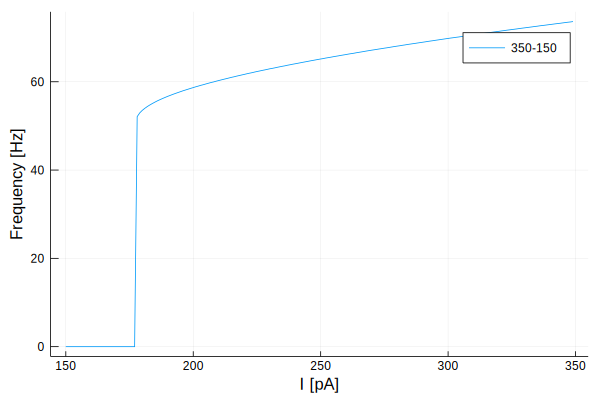

In [22]:
currents2 = collect(349:-1:150)
plot(currents2,frequencies2[2:end],xlabel ="I [pA]" ,ylabel="Frequency [Hz]",label="350-150")
#savefig("FreqDown.pdf")

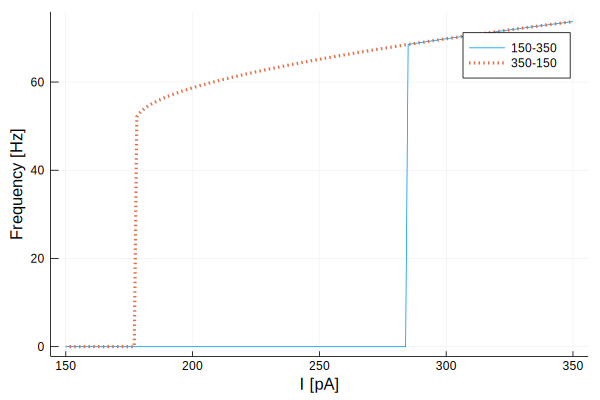

In [23]:
currents = collect(150:350)
plot(currents,frequencies,xlabel ="I [pA]" ,ylabel="Frequency [Hz]",label="150-350")
currents2 = collect(349:-1:150)
plot!(currents2,frequencies2[2:end],line=(:dot,4),label="350-150")
#savefig("Freqs.pdf")